In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../datasets/test_scores.csv')

In [3]:
df.head()

school school_setting school_type classroom teaching_method  n_student  \
0  ANKYI          Urban  Non-public       6OL        Standard       20.0   
1  ANKYI          Urban  Non-public       6OL        Standard       20.0   
2  ANKYI          Urban  Non-public       6OL        Standard       20.0   
3  ANKYI          Urban  Non-public       6OL        Standard       20.0   
4  ANKYI          Urban  Non-public       6OL        Standard       20.0   

  student_id  gender             lunch  pretest  posttest  
0      2FHT3  Female  Does not qualify     62.0      72.0  
1      3JIVH  Female  Does not qualify     66.0      79.0  
2      3XOWE    Male  Does not qualify     64.0      76.0  
3      556O0  Female  Does not qualify     61.0      77.0  
4      74LOE    Male  Does not qualify     64.0      76.0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2133 entries, 0 to 2132
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   school           2133 non-null   object 
 1   school_setting   2133 non-null   object 
 2   school_type      2133 non-null   object 
 3   classroom        2133 non-null   object 
 4   teaching_method  2133 non-null   object 
 5   n_student        2133 non-null   float64
 6   student_id       2133 non-null   object 
 7   gender           2133 non-null   object 
 8   lunch            2133 non-null   object 
 9   pretest          2133 non-null   float64
 10  posttest         2133 non-null   float64
dtypes: float64(3), object(8)
memory usage: 183.4+ KB


## 1. Exploratory Data Analysis

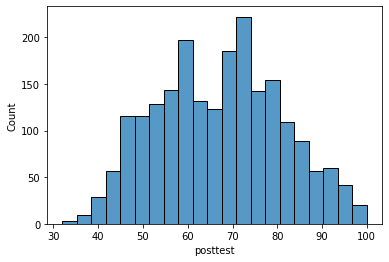

In [5]:
sns.histplot(data=df, x='posttest');

### Pretest scores

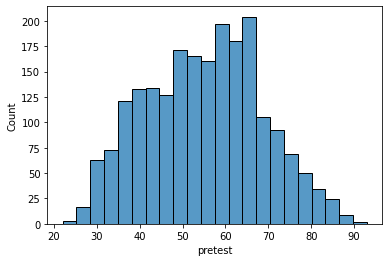

In [6]:
sns.histplot(data=df, x='pretest');

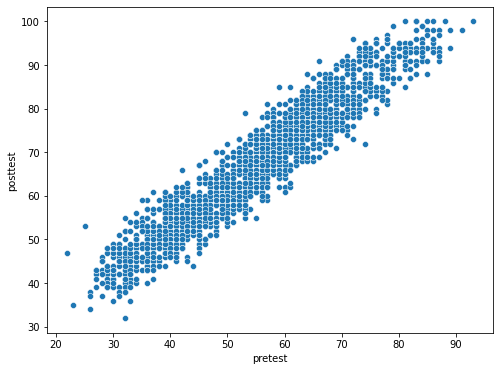

In [8]:
plt.figure(figsize=(8,6))

sns.scatterplot(data=df, x='pretest', y='posttest');

### School setting

In [40]:
df['school_setting'].mode()[0]

'Urban'

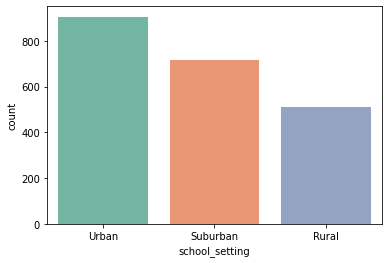

In [16]:
sns.countplot(data=df, x='school_setting', palette='Set2');

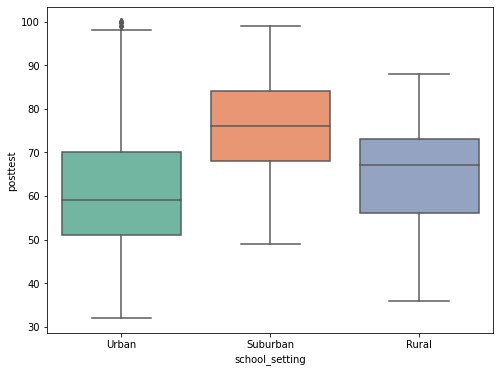

In [17]:
plt.figure(figsize=(8,6))

sns.boxplot(data=df, x='school_setting', y='posttest', palette='Set2');

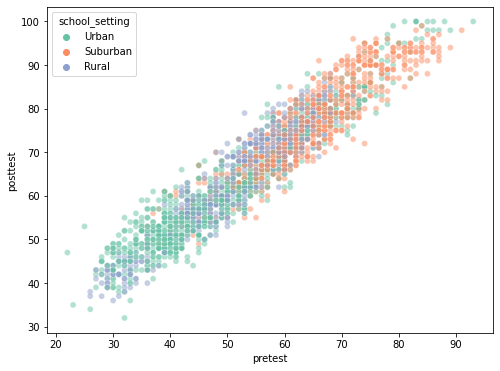

In [18]:
plt.figure(figsize=(8,6))

sns.scatterplot(data=df, x='pretest', y='posttest', hue='school_setting', 
                alpha=0.5, palette='Set2');

### School type

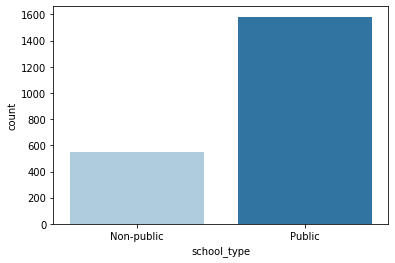

In [15]:
sns.countplot(data=df, x='school_type', palette='Paired');

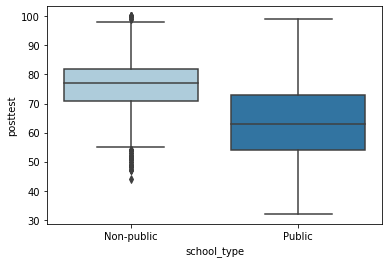

In [20]:
sns.boxplot(data=df, x='school_type', y='posttest', palette='Paired');

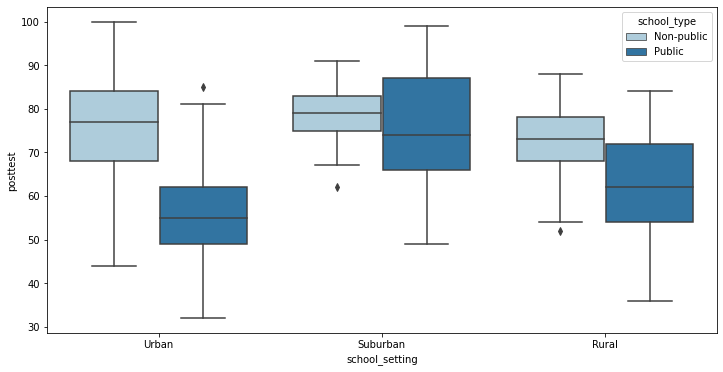

In [23]:
plt.figure(figsize=(12,6))

sns.boxplot(data=df, x='school_setting', y='posttest', 
            hue='school_type', palette='Paired');

### Teaching method

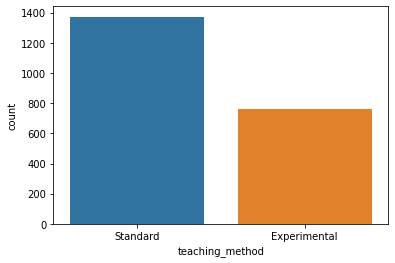

In [24]:
sns.countplot(data=df, x='teaching_method');

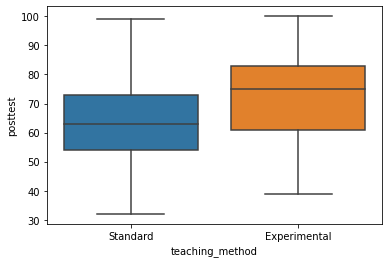

In [25]:
sns.boxplot(data=df, x='teaching_method', y='posttest');

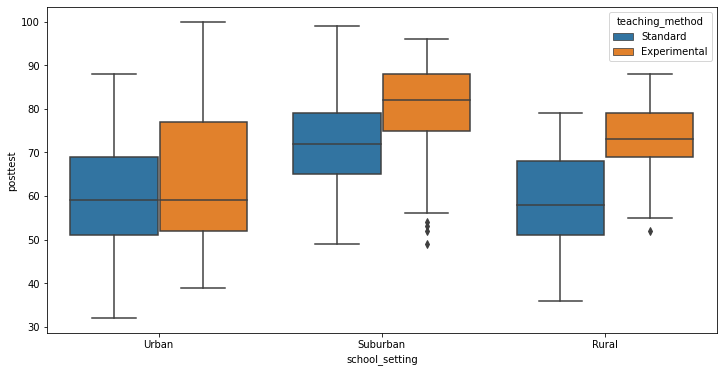

In [27]:
plt.figure(figsize=(12,6))

sns.boxplot(data=df, x='school_setting', y='posttest', hue='teaching_method');

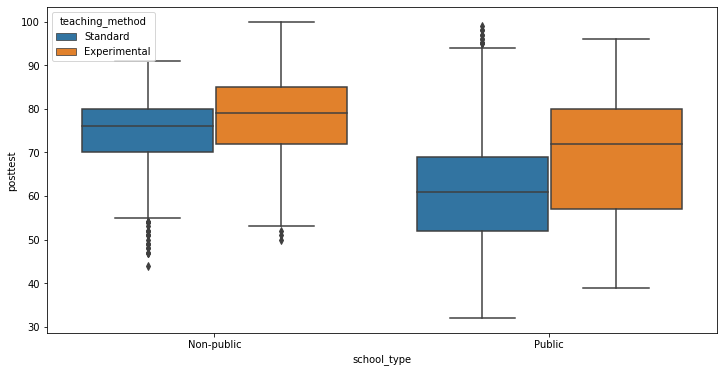

In [28]:
plt.figure(figsize=(12,6))

sns.boxplot(data=df, x='school_type', y='posttest', hue='teaching_method');

### Gender

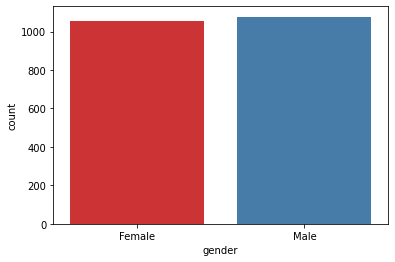

In [33]:
sns.countplot(data=df, x='gender', palette='Set1');

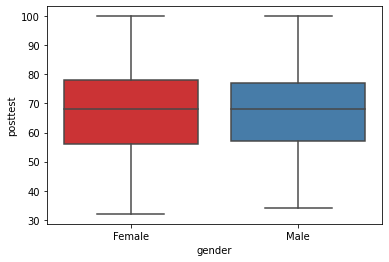

In [34]:
sns.boxplot(data=df, x='gender', y='posttest', palette='Set1');

### Lunch

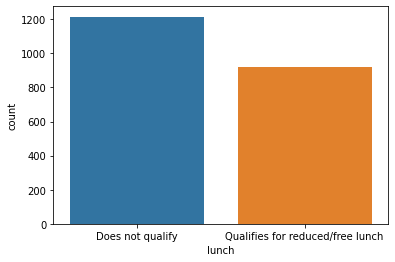

In [35]:
sns.countplot(data=df, x='lunch');

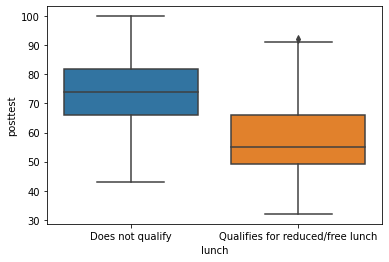

In [36]:
sns.boxplot(data=df, x='lunch', y='posttest');

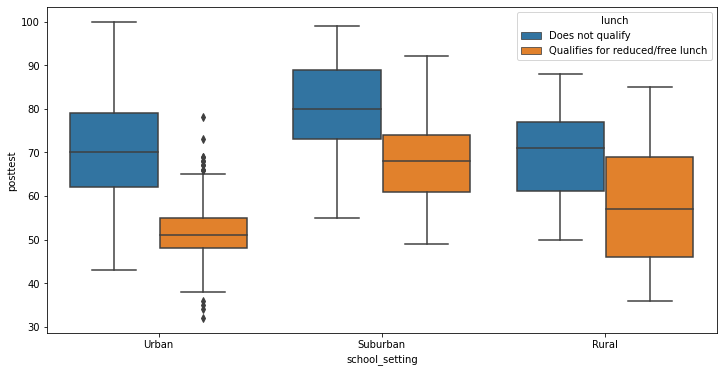

In [37]:
plt.figure(figsize=(12,6))

sns.boxplot(data=df, x='school_setting', y='posttest', hue='lunch');

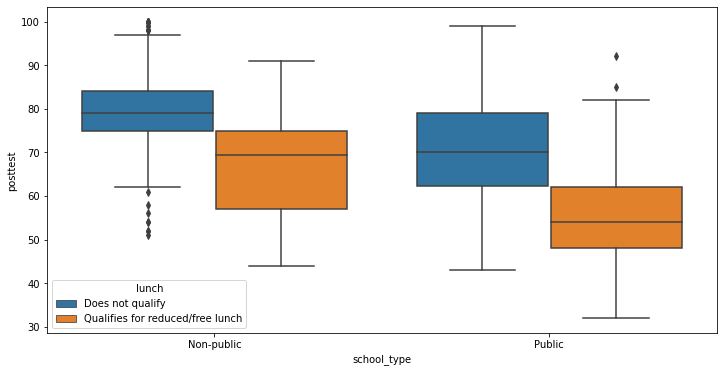

In [38]:
plt.figure(figsize=(12,6))

sns.boxplot(data=df, x='school_type', y='posttest', hue='lunch');

### Exploration by school

In [41]:
df

school school_setting school_type classroom teaching_method  n_student  \
0     ANKYI          Urban  Non-public       6OL        Standard       20.0   
1     ANKYI          Urban  Non-public       6OL        Standard       20.0   
2     ANKYI          Urban  Non-public       6OL        Standard       20.0   
3     ANKYI          Urban  Non-public       6OL        Standard       20.0   
4     ANKYI          Urban  Non-public       6OL        Standard       20.0   
...     ...            ...         ...       ...             ...        ...   
2128  ZOWMK          Urban      Public       ZBH        Standard       30.0   
2129  ZOWMK          Urban      Public       ZBH        Standard       30.0   
2130  ZOWMK          Urban      Public       ZBH        Standard       30.0   
2131  ZOWMK          Urban      Public       ZBH        Standard       30.0   
2132  ZOWMK          Urban      Public       ZBH        Standard       30.0   

     student_id  gender                             lunch  pretest  posttest  
0         2FHT3  Female                  Does not qualify     62.0      72.0  
1         3JIVH  Female                  Does not qualify     66.0      79.0  
2         3XOWE    Male                  Does not qualify     64.0      76.0  
3         556O0  Female                  Does not qualify     61.0      77.0  
4         74LOE    Male                  Does not qualify     64.0      76.0  
...         ...     ...                               ...      ...       ...  
2128      T8LSK  Female                  Does not qualify     39.0      55.0  
2129      VNP26  Female  Qualifies for reduced/free lunch     38.0      46.0  
2130      YDR1Z  Female  Qualifies for reduced/free lunch     45.0      51.0  
2131      YUEIH    Male  Qualifies for reduced/free lunch     46.0      53.0  
2132      ZVCQ8    Male  Qualifies for reduced/free lunch     41.0      48.0  

[2133 rows x 11 columns]

In [57]:
df['school_setting'].mode()[0]

'Urban'

In [77]:
def get_ratio_lunch(x):
    return (x['lunch']=='Qualifies for reduced/free lunch').sum()/len(x)

In [75]:
def get_ratio_method(x):
    return (x['teaching_method']=='Experimental').sum()/len(x)

In [70]:
d_agg = {'school_setting':'first',
        'school_type':'first',
        'classroom':'nunique',
        'n_student':'count',
        'pretest':'mean',
        'posttest':'mean'}

In [72]:
df_schools = df.groupby('school').agg(d_agg)

In [73]:
df_schools

school_setting school_type  classroom  n_student    pretest   posttest
school                                                                       
ANKYI           Urban  Non-public          2         41  61.341463  71.390244
CCAAW        Suburban  Non-public          6        109  64.623853  78.110092
CIMBB           Urban  Non-public          4         74  65.067568  76.945946
CUQAM           Urban      Public          4        107  53.925234  65.560748
DNQDD        Suburban      Public          5        122  54.327869  66.565574
FBUMG           Rural  Non-public          3         46  62.891304  78.608696
GJJHK        Suburban      Public          5        118  53.194915  65.025424
GOKXL           Rural      Public          3         64  50.796875  64.953125
GOOBU           Urban      Public          6        158  38.196203  49.613924
IDGFP           Urban  Non-public          5         94  75.202128  87.223404
KFZMY           Urban  Non-public          2         52  41.865385  54.576923
KZKKE           Rural      Public          5        111  37.261261  47.918919
LAYPA           Rural      Public          3         57  62.035088  73.508772
OJOBU           Rural      Public          4         81  56.197531  67.814815
QOQTS           Urban      Public          6        149  52.597315  64.671141
UAGPU        Suburban      Public          4         87  62.390805  71.873563
UKPGS        Suburban      Public          6        128  78.453125  91.164062
UUUQX        Suburban  Non-public          5         84  67.309524  79.261905
VHDHF           Rural  Non-public          3         51  52.666667  66.843137
VKWQH           Rural      Public          5        100  52.060000  64.820000
VVTVA           Urban      Public          4        114  36.008772  49.175439
ZMNYA        Suburban      Public          3         69  68.130435  81.608696
ZOWMK           Urban      Public          4        117  41.572650  52.905983

In [84]:
method = pd.DataFrame(df.groupby('school').apply(get_ratio_method), columns=['fraction_experimental'])

In [85]:
lunch = pd.DataFrame(df.groupby('school').apply(get_ratio_lunch), columns=['fraction_lunch'])

In [86]:
method

fraction_experimental
school                       
ANKYI                0.000000
CCAAW                0.633028
CIMBB                0.229730
CUQAM                0.224299
DNQDD                0.393443
FBUMG                1.000000
GJJHK                0.228814
GOKXL                0.703125
GOOBU                0.164557
IDGFP                0.404255
KFZMY                0.519231
KZKKE                0.000000
LAYPA                0.298246
OJOBU                0.209877
QOQTS                0.355705
UAGPU                0.000000
UKPGS                0.468750
UUUQX                0.392857
VHDHF                0.686275
VKWQH                0.410000
VVTVA                0.526316
ZMNYA                0.681159
ZOWMK                0.256410

In [87]:
lunch

fraction_lunch
school                
ANKYI         0.024390
CCAAW         0.486239
CIMBB         0.013514
CUQAM         0.149533
DNQDD         0.631148
FBUMG         0.239130
GJJHK         0.855932
GOKXL         0.812500
GOOBU         0.917722
IDGFP         0.000000
KFZMY         0.807692
KZKKE         1.000000
LAYPA         0.000000
OJOBU         0.135802
QOQTS         0.060403
UAGPU         0.022989
UKPGS         0.000000
UUUQX         0.059524
VHDHF         0.882353
VKWQH         0.100000
VVTVA         0.982456
ZMNYA         0.115942
ZOWMK         0.905983

In [91]:
df_schools = df_schools.merge(method, left_index=True, right_index=True).merge(lunch, left_index=True, right_index=True)

In [93]:
df_schools.columns

Index(['school_setting', 'school_type', 'classroom', 'n_student', 'pretest',
       'posttest', 'fraction_experimental', 'fraction_lunch'],
      dtype='object')

In [95]:
df_schools = df_schools.rename(columns={'classroom':'number_of_classes',
                           'n_student':'number_of_students'})

In [96]:
df_schools

school_setting school_type  number_of_classes  number_of_students  \
school                                                                     
ANKYI           Urban  Non-public                  2                  41   
CCAAW        Suburban  Non-public                  6                 109   
CIMBB           Urban  Non-public                  4                  74   
CUQAM           Urban      Public                  4                 107   
DNQDD        Suburban      Public                  5                 122   
FBUMG           Rural  Non-public                  3                  46   
GJJHK        Suburban      Public                  5                 118   
GOKXL           Rural      Public                  3                  64   
GOOBU           Urban      Public                  6                 158   
IDGFP           Urban  Non-public                  5                  94   
KFZMY           Urban  Non-public                  2                  52   
KZKKE           Rural      Public                  5                 111   
LAYPA           Rural      Public                  3                  57   
OJOBU           Rural      Public                  4                  81   
QOQTS           Urban      Public                  6                 149   
UAGPU        Suburban      Public                  4                  87   
UKPGS        Suburban      Public                  6                 128   
UUUQX        Suburban  Non-public                  5                  84   
VHDHF           Rural  Non-public                  3                  51   
VKWQH           Rural      Public                  5                 100   
VVTVA           Urban      Public                  4                 114   
ZMNYA        Suburban      Public                  3                  69   
ZOWMK           Urban      Public                  4                 117   

          pretest   posttest  fraction_experimental  fraction_lunch  
school                                                               
ANKYI   61.341463  71.390244               0.000000        0.024390  
CCAAW   64.623853  78.110092               0.633028        0.486239  
CIMBB   65.067568  76.945946               0.229730        0.013514  
CUQAM   53.925234  65.560748               0.224299        0.149533  
DNQDD   54.327869  66.565574               0.393443        0.631148  
FBUMG   62.891304  78.608696               1.000000        0.239130  
GJJHK   53.194915  65.025424               0.228814        0.855932  
GOKXL   50.796875  64.953125               0.703125        0.812500  
GOOBU   38.196203  49.613924               0.164557        0.917722  
IDGFP   75.202128  87.223404               0.404255        0.000000  
KFZMY   41.865385  54.576923               0.519231        0.807692  
KZKKE   37.261261  47.918919               0.000000        1.000000  
LAYPA   62.035088  73.508772               0.298246        0.000000  
OJOBU   56.197531  67.814815               0.209877        0.135802  
QOQTS   52.597315  64.671141               0.355705        0.060403  
UAGPU   62.390805  71.873563               0.000000        0.022989  
UKPGS   78.453125  91.164062               0.468750        0.000000  
UUUQX   67.309524  79.261905               0.392857        0.059524  
VHDHF   52.666667  66.843137               0.686275        0.882353  
VKWQH   52.060000  64.820000               0.410000        0.100000  
VVTVA   36.008772  49.175439               0.526316        0.982456  
ZMNYA   68.130435  81.608696               0.681159        0.115942  
ZOWMK   41.572650  52.905983               0.256410        0.905983

In [98]:
df_schools.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23 entries, ANKYI to ZOWMK
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   school_setting         23 non-null     object 
 1   school_type            23 non-null     object 
 2   number_of_classes      23 non-null     int64  
 3   number_of_students     23 non-null     int64  
 4   pretest                23 non-null     float64
 5   posttest               23 non-null     float64
 6   fraction_experimental  23 non-null     float64
 7   fraction_lunch         23 non-null     float64
dtypes: float64(4), int64(2), object(2)
memory usage: 2.2+ KB


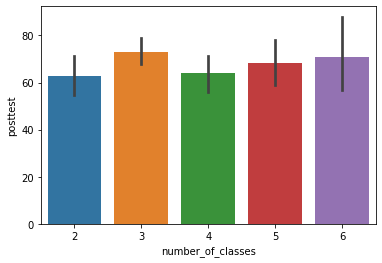

In [103]:
sns.barplot(data=df_schools, x='number_of_classes', y='posttest', estimator=np.mean);

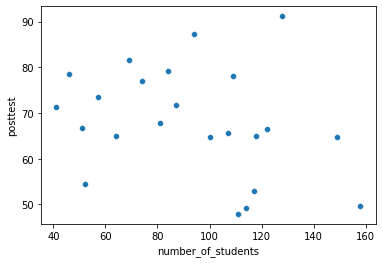

In [105]:
sns.scatterplot(data=df_schools, x='number_of_students', y='posttest');